(0.0, 1.0)

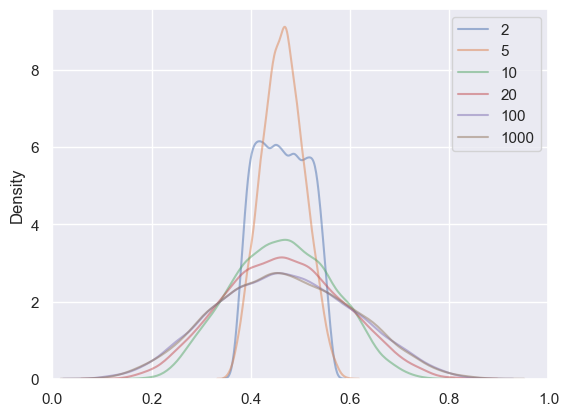

In [241]:
from scipy import stats

N = 10000
alpha = np.random.randn()
beta = np.random.randn(1000)
for p in [2,5,10,20,100,1000]:
    X = np.random.rand(N*p).reshape((N,p))
    eta = 2*(X-0.5).dot(beta[:p])/np.sqrt(p) + alpha
    z = stats.logistic.cdf(eta)
    sns.kdeplot(z, alpha=0.5, label=p)
plt.legend()
plt.xlim(0,1)

In [261]:
import sys, os; sys.path.append(os.path.dirname(os.getcwd())) 

import numpy as np
from scipy import stats
from benchmark import bench
from pyfrechet.metric_spaces import *

OUT_FILE = 'result_sphere_cross_est_new_dgp_2.json'

def gen_data(N, p, alpha, beta, eps=0.1):
    M = Sphere(2)

    def m(x):
        eta = 2 * (x - 0.5).dot(beta) / np.sqrt(p) + alpha
        z = stats.logistic.cdf(eta)
        dz = np.sqrt(1 - z**2)
        pz = np.pi * z
        y= np.c_[dz * np.cos(pz), dz * np.sin(pz), z]
        return y

    def add_noise(x, sig):
        v = sig * np.random.normal(size=(M.manifold.dim+1,))
        pvx = v - np.dot(x, v) * x
        return M.manifold.metric.exp(pvx, x)

    x = np.random.rand(N*p).reshape((N,p))
    mx = m(x)
    y = np.array([ add_noise(mx[i,:], eps) for i in range(N)])
    return x, MetricData(M, y), MetricData(M, mx)

bench(
    gen_data,
    OUT_FILE,
    ps=[50, 400, 800],
    Ns=[5],
    replicas=25
)

[2023-06-07 15:31:07.600329] Progress: N=5	p=50	i=0
[2023-06-07 15:31:07.608088] Distances for cart_2means
[2023-06-07 15:31:07.608114] dt = 0
[2023-06-07 15:31:07.608119] Fitting for cart_2means
[2023-06-07 15:31:07.651746] dt = 0.043657779693603516
[2023-06-07 15:31:07.651767] MSE for cart_2means
[2023-06-07 15:31:07.673310] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
INFO: Using numpy backend
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    2.0s finished


[2023-06-07 15:31:09.668322] dt = 1.994988203048706
[2023-06-07 15:31:09.668469] Fitting for medoid_2means
[2023-06-07 15:31:09.972011] dt = 0.3037128448486328
[2023-06-07 15:31:09.972091] MSE for medoid_2means
[2023-06-07 15:31:09.996466] Distances for medoid_greedy
[2023-06-07 15:31:09.996486] dt = 7.152557373046875e-07
[2023-06-07 15:31:09.996494] Fitting for medoid_greedy
[2023-06-07 15:31:09.997385] dt = 0.0009202957153320312
[2023-06-07 15:31:09.997396] MSE for medoid_greedy
[2023-06-07 15:31:10.019785] Progress: N=5	p=50	i=1
[2023-06-07 15:31:10.025759] Distances for cart_2means
[2023-06-07 15:31:10.025776] dt = 0
[2023-06-07 15:31:10.025779] Fitting for cart_2means
[2023-06-07 15:31:10.062903] dt = 0.03714299201965332
[2023-06-07 15:31:10.062931] MSE for cart_2means
[2023-06-07 15:31:10.085315] Distances for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
INFO: Using numpy backend
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:11.322864] dt = 1.237529993057251
[2023-06-07 15:31:11.322888] Fitting for medoid_2means
[2023-06-07 15:31:11.363058] dt = 0.040212154388427734
[2023-06-07 15:31:11.363080] MSE for medoid_2means
[2023-06-07 15:31:11.385577] Distances for medoid_greedy
[2023-06-07 15:31:11.385597] dt = 0.0
[2023-06-07 15:31:11.385602] Fitting for medoid_greedy
[2023-06-07 15:31:11.386411] dt = 0.0008349418640136719
[2023-06-07 15:31:11.386418] MSE for medoid_greedy
[2023-06-07 15:31:11.408421] Progress: N=5	p=50	i=2
[2023-06-07 15:31:11.414399] Distances for cart_2means
[2023-06-07 15:31:11.414408] dt = 0
[2023-06-07 15:31:11.414411] Fitting for cart_2means
[2023-06-07 15:31:11.448528] dt = 0.03412818908691406
[2023-06-07 15:31:11.448550] MSE for cart_2means
[2023-06-07 15:31:11.470780] Distances for medoid_2means
[2023-06-07 15:31:11.480568] dt = 0.009768962860107422
[2023-06-07 15:31:11.480581] Fitting for medoid_2means
[2023-06-07 15:31:11.513622] dt = 0.03307199478149414
[2023-06-0

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:11.780372] Distances for medoid_2means
[2023-06-07 15:31:11.790554] dt = 0.009918928146362305
[2023-06-07 15:31:11.790569] Fitting for medoid_2means
[2023-06-07 15:31:11.824945] dt = 0.0346522331237793
[2023-06-07 15:31:11.824982] MSE for medoid_2means
[2023-06-07 15:31:11.850222] Distances for medoid_greedy
[2023-06-07 15:31:11.850241] dt = 0.0
[2023-06-07 15:31:11.850246] Fitting for medoid_greedy
[2023-06-07 15:31:11.851121] dt = 0.0008997917175292969
[2023-06-07 15:31:11.851131] MSE for medoid_greedy
[2023-06-07 15:31:11.877311] Progress: N=5	p=50	i=5
[2023-06-07 15:31:11.883641] Distances for cart_2means
[2023-06-07 15:31:11.883663] dt = 0
[2023-06-07 15:31:11.883667] Fitting for cart_2means
[2023-06-07 15:31:11.919243] dt = 0.035600900650024414
[2023-06-07 15:31:11.919263] MSE for cart_2means
[2023-06-07 15:31:11.953051] Distances for medoid_2means
[2023-06-07 15:31:11.962925] dt = 0.009855985641479492
[2023-06-07 15:31:11.962938] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:11.996171] dt = 0.033261775970458984
[2023-06-07 15:31:11.996281] MSE for medoid_2means
[2023-06-07 15:31:12.032590] Distances for medoid_greedy
[2023-06-07 15:31:12.032609] dt = 9.5367431640625e-07
[2023-06-07 15:31:12.032617] Fitting for medoid_greedy
[2023-06-07 15:31:12.033464] dt = 0.0008730888366699219
[2023-06-07 15:31:12.033470] MSE for medoid_greedy
[2023-06-07 15:31:12.067499] Progress: N=5	p=50	i=6
[2023-06-07 15:31:12.073032] Distances for cart_2means
[2023-06-07 15:31:12.073039] dt = 0
[2023-06-07 15:31:12.073042] Fitting for cart_2means
[2023-06-07 15:31:12.106406] dt = 0.03337216377258301
[2023-06-07 15:31:12.106428] MSE for cart_2means
[2023-06-07 15:31:12.128392] Distances for medoid_2means
[2023-06-07 15:31:12.137660] dt = 0.009250879287719727
[2023-06-07 15:31:12.137669] Fitting for medoid_2means
[2023-06-07 15:31:12.174589] dt = 0.03694486618041992
[2023-06-07 15:31:12.174613] MSE for medoid_2means
[2023-06-07 15:31:12.197074] Distances for medoid_

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
INFO: Using numpy backend
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:13.747634] dt = 1.306718111038208
[2023-06-07 15:31:13.747661] Fitting for medoid_2means
[2023-06-07 15:31:13.786079] dt = 0.038465023040771484
[2023-06-07 15:31:13.786104] MSE for medoid_2means
[2023-06-07 15:31:13.808604] Distances for medoid_greedy
[2023-06-07 15:31:13.808626] dt = 9.5367431640625e-07
[2023-06-07 15:31:13.808634] Fitting for medoid_greedy
[2023-06-07 15:31:13.809479] dt = 0.0008740425109863281
[2023-06-07 15:31:13.809487] MSE for medoid_greedy
[2023-06-07 15:31:13.831677] Progress: N=5	p=50	i=9
[2023-06-07 15:31:13.837144] Distances for cart_2means
[2023-06-07 15:31:13.837150] dt = 0
[2023-06-07 15:31:13.837153] Fitting for cart_2means
[2023-06-07 15:31:13.870497] dt = 0.03335094451904297
[2023-06-07 15:31:13.870516] MSE for cart_2means
[2023-06-07 15:31:13.892896] Distances for medoid_2means
[2023-06-07 15:31:13.902274] dt = 0.009359121322631836
[2023-06-07 15:31:13.902284] Fitting for medoid_2means
[2023-06-07 15:31:13.934217] dt = 0.031961917877

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:14.202872] dt = 0.009729146957397461
[2023-06-07 15:31:14.202930] Fitting for medoid_2means
[2023-06-07 15:31:14.238485] dt = 0.03563261032104492
[2023-06-07 15:31:14.238505] MSE for medoid_2means
[2023-06-07 15:31:14.262328] Distances for medoid_greedy
[2023-06-07 15:31:14.262344] dt = 9.5367431640625e-07
[2023-06-07 15:31:14.262351] Fitting for medoid_greedy
[2023-06-07 15:31:14.263167] dt = 0.0008378028869628906
[2023-06-07 15:31:14.263174] MSE for medoid_greedy
[2023-06-07 15:31:14.288947] Progress: N=5	p=50	i=12
[2023-06-07 15:31:14.294667] Distances for cart_2means
[2023-06-07 15:31:14.294684] dt = 0
[2023-06-07 15:31:14.294687] Fitting for cart_2means
[2023-06-07 15:31:14.327375] dt = 0.03270697593688965
[2023-06-07 15:31:14.327402] MSE for cart_2means
[2023-06-07 15:31:14.349629] Distances for medoid_2means
[2023-06-07 15:31:14.359303] dt = 0.009654045104980469
[2023-06-07 15:31:14.359315] Fitting for medoid_2means
[2023-06-07 15:31:14.388775] dt = 0.029491901

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:14.411840] Distances for medoid_greedy
[2023-06-07 15:31:14.412146] dt = 1.6689300537109375e-06
[2023-06-07 15:31:14.412159] Fitting for medoid_greedy
[2023-06-07 15:31:14.413057] dt = 0.001218557357788086
[2023-06-07 15:31:14.413063] MSE for medoid_greedy
[2023-06-07 15:31:14.438959] Progress: N=5	p=50	i=13
[2023-06-07 15:31:14.444870] Distances for cart_2means
[2023-06-07 15:31:14.444908] dt = 0
[2023-06-07 15:31:14.444913] Fitting for cart_2means
[2023-06-07 15:31:14.478686] dt = 0.03381681442260742
[2023-06-07 15:31:14.478704] MSE for cart_2means
[2023-06-07 15:31:14.503759] Distances for medoid_2means
[2023-06-07 15:31:14.513434] dt = 0.009659051895141602
[2023-06-07 15:31:14.513448] Fitting for medoid_2means
[2023-06-07 15:31:14.544265] dt = 0.03084397315979004
[2023-06-07 15:31:14.544315] MSE for medoid_2means
[2023-06-07 15:31:14.568832] Distances for medoid_greedy
[2023-06-07 15:31:14.568844] dt = 9.5367431640625e-07
[2023-06-07 15:31:14.568852] Fitting for m

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:14.868662] dt = 0.000982046127319336
[2023-06-07 15:31:14.868848] MSE for medoid_greedy
[2023-06-07 15:31:14.895006] Progress: N=5	p=50	i=16
[2023-06-07 15:31:14.901545] Distances for cart_2means
[2023-06-07 15:31:14.901557] dt = 0
[2023-06-07 15:31:14.901560] Fitting for cart_2means
[2023-06-07 15:31:14.934502] dt = 0.03295731544494629
[2023-06-07 15:31:14.934521] MSE for cart_2means
[2023-06-07 15:31:14.956463] Distances for medoid_2means
[2023-06-07 15:31:14.966532] dt = 0.010027885437011719
[2023-06-07 15:31:14.966542] Fitting for medoid_2means
[2023-06-07 15:31:14.999397] dt = 0.03290605545043945
[2023-06-07 15:31:14.999418] MSE for medoid_2means
[2023-06-07 15:31:15.021366] Distances for medoid_greedy
[2023-06-07 15:31:15.021384] dt = 1.1920928955078125e-06
[2023-06-07 15:31:15.021391] Fitting for medoid_greedy
[2023-06-07 15:31:15.022230] dt = 0.0008637905120849609
[2023-06-07 15:31:15.022237] MSE for medoid_greedy
[2023-06-07 15:31:15.044853] Progress: N=5	p=5

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:15.115401] dt = 0.010106801986694336
[2023-06-07 15:31:15.115464] Fitting for medoid_2means
[2023-06-07 15:31:15.147374] dt = 0.03198719024658203
[2023-06-07 15:31:15.147393] MSE for medoid_2means
[2023-06-07 15:31:15.171207] Distances for medoid_greedy
[2023-06-07 15:31:15.171219] dt = 9.5367431640625e-07
[2023-06-07 15:31:15.171226] Fitting for medoid_greedy
[2023-06-07 15:31:15.172057] dt = 0.0008480548858642578
[2023-06-07 15:31:15.172063] MSE for medoid_greedy
[2023-06-07 15:31:15.196075] Progress: N=5	p=50	i=18
[2023-06-07 15:31:15.201610] Distances for cart_2means
[2023-06-07 15:31:15.201616] dt = 0
[2023-06-07 15:31:15.201619] Fitting for cart_2means
[2023-06-07 15:31:15.234656] dt = 0.03304600715637207
[2023-06-07 15:31:15.234676] MSE for cart_2means
[2023-06-07 15:31:15.256672] Distances for medoid_2means
[2023-06-07 15:31:15.266645] dt = 0.009955167770385742
[2023-06-07 15:31:15.266659] Fitting for medoid_2means
[2023-06-07 15:31:15.297080] dt = 0.030453920

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.


[2023-06-07 15:31:15.346849] Progress: N=5	p=50	i=19
[2023-06-07 15:31:15.354381] Distances for cart_2means
[2023-06-07 15:31:15.354406] dt = 0
[2023-06-07 15:31:15.354410] Fitting for cart_2means
[2023-06-07 15:31:15.431776] dt = 0.07739615440368652
[2023-06-07 15:31:15.431796] MSE for cart_2means
[2023-06-07 15:31:15.453825] Distances for medoid_2means
[2023-06-07 15:31:15.464626] dt = 0.010784387588500977
[2023-06-07 15:31:15.464640] Fitting for medoid_2means
[2023-06-07 15:31:15.495794] dt = 0.03118443489074707
[2023-06-07 15:31:15.495814] MSE for medoid_2means
[2023-06-07 15:31:15.517598] Distances for medoid_greedy
[2023-06-07 15:31:15.517614] dt = 9.5367431640625e-07
[2023-06-07 15:31:15.517622] Fitting for medoid_greedy
[2023-06-07 15:31:15.518458] dt = 0.0008602142333984375
[2023-06-07 15:31:15.518464] MSE for medoid_greedy
[2023-06-07 15:31:15.542459] Progress: N=5	p=50	i=20
[2023-06-07 15:31:15.548146] Distances for cart_2means
[2023-06-07 15:31:15.548152] dt = 0
[2023-06-07

[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:15.580855] dt = 0.032708168029785156
[2023-06-07 15:31:15.580934] MSE for cart_2means
[2023-06-07 15:31:15.606296] Distances for medoid_2means
[2023-06-07 15:31:15.616358] dt = 0.010045051574707031
[2023-06-07 15:31:15.616369] Fitting for medoid_2means
[2023-06-07 15:31:15.648174] dt = 0.031831979751586914
[2023-06-07 15:31:15.648193] MSE for medoid_2means
[2023-06-07 15:31:15.671109] Distances for medoid_greedy
[2023-06-07 15:31:15.671129] dt = 9.5367431640625e-07
[2023-06-07 15:31:15.671137] Fitting for medoid_greedy
[2023-06-07 15:31:15.671987] dt = 0.0008769035339355469
[2023-06-07 15:31:15.671996] MSE for medoid_greedy
[2023-06-07 15:31:15.698083] Progress: N=5	p=50	i=21
[2023-06-07 15:31:15.703714] Distances for cart_2means
[2023-06-07 15:31:15.703722] dt = 0
[2023-06-07 15:31:15.703726] Fitting for cart_2means
[2023-06-07 15:31:15.735118] dt = 0.0314030647277832
[2023-06-07 15:31:15.735138] MSE for cart_2means
[2023-06-07 15:31:15.756721] Distances for medoid_2

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:15.848430] Progress: N=5	p=50	i=22
[2023-06-07 15:31:15.854306] Distances for cart_2means
[2023-06-07 15:31:15.854316] dt = 0
[2023-06-07 15:31:15.854320] Fitting for cart_2means
[2023-06-07 15:31:15.886979] dt = 0.03267312049865723
[2023-06-07 15:31:15.886999] MSE for cart_2means
[2023-06-07 15:31:15.908718] Distances for medoid_2means
[2023-06-07 15:31:15.918335] dt = 0.009582996368408203
[2023-06-07 15:31:15.918346] Fitting for medoid_2means
[2023-06-07 15:31:15.951521] dt = 0.03322100639343262
[2023-06-07 15:31:15.951541] MSE for medoid_2means
[2023-06-07 15:31:15.976420] Distances for medoid_greedy
[2023-06-07 15:31:15.976437] dt = 0.0
[2023-06-07 15:31:15.976441] Fitting for medoid_greedy
[2023-06-07 15:31:15.977288] dt = 0.0008690357208251953
[2023-06-07 15:31:15.977296] MSE for medoid_greedy
[2023-06-07 15:31:16.003113] Progress: N=5	p=50	i=23
[2023-06-07 15:31:16.008780] Distances for cart_2means
[2023-06-07 15:31:16.008806] dt = 0
[2023-06-07 15:31:16.008810

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:16.080296] dt = 0.010414838790893555
[2023-06-07 15:31:16.080354] Fitting for medoid_2means
[2023-06-07 15:31:16.112651] dt = 0.032373905181884766
[2023-06-07 15:31:16.112672] MSE for medoid_2means
[2023-06-07 15:31:16.134629] Distances for medoid_greedy
[2023-06-07 15:31:16.134647] dt = 1.1920928955078125e-06
[2023-06-07 15:31:16.134655] Fitting for medoid_greedy
[2023-06-07 15:31:16.135472] dt = 0.0008418560028076172
[2023-06-07 15:31:16.135478] MSE for medoid_greedy
[2023-06-07 15:31:16.157790] Progress: N=5	p=50	i=24
[2023-06-07 15:31:16.163608] Distances for cart_2means
[2023-06-07 15:31:16.163623] dt = 0
[2023-06-07 15:31:16.163627] Fitting for cart_2means
[2023-06-07 15:31:16.195476] dt = 0.03186774253845215
[2023-06-07 15:31:16.195497] MSE for cart_2means
[2023-06-07 15:31:16.217583] Distances for medoid_2means
[2023-06-07 15:31:16.227739] dt = 0.01013803482055664
[2023-06-07 15:31:16.227755] Fitting for medoid_2means
[2023-06-07 15:31:16.261225] dt = 0.033504

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:17.110293] dt = 0.2675490379333496
[2023-06-07 15:31:17.110376] MSE for medoid_2means
[2023-06-07 15:31:17.143633] Distances for medoid_greedy
[2023-06-07 15:31:17.143655] dt = 9.5367431640625e-07
[2023-06-07 15:31:17.143664] Fitting for medoid_greedy
[2023-06-07 15:31:17.149444] dt = 0.005810976028442383
[2023-06-07 15:31:17.149458] MSE for medoid_greedy
[2023-06-07 15:31:17.183369] Progress: N=5	p=400	i=1
[2023-06-07 15:31:17.211641] Distances for cart_2means
[2023-06-07 15:31:17.211673] dt = 0
[2023-06-07 15:31:17.211728] Fitting for cart_2means
[2023-06-07 15:31:17.685092] dt = 0.4734530448913574
[2023-06-07 15:31:17.685177] MSE for cart_2means
[2023-06-07 15:31:17.709948] Distances for medoid_2means
[2023-06-07 15:31:17.719858] dt = 0.009892940521240234
[2023-06-07 15:31:17.719868] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:17.968698] dt = 0.2488572597503662
[2023-06-07 15:31:17.968810] MSE for medoid_2means
[2023-06-07 15:31:17.990716] Distances for medoid_greedy
[2023-06-07 15:31:17.990738] dt = 1.1920928955078125e-06
[2023-06-07 15:31:17.990746] Fitting for medoid_greedy
[2023-06-07 15:31:17.996606] dt = 0.0058896541595458984
[2023-06-07 15:31:17.996614] MSE for medoid_greedy
[2023-06-07 15:31:18.019298] Progress: N=5	p=400	i=2
[2023-06-07 15:31:18.025117] Distances for cart_2means
[2023-06-07 15:31:18.025124] dt = 0
[2023-06-07 15:31:18.025127] Fitting for cart_2means
[2023-06-07 15:31:18.514745] dt = 0.4896249771118164
[2023-06-07 15:31:18.514868] MSE for cart_2means
[2023-06-07 15:31:18.536970] Distances for medoid_2means
[2023-06-07 15:31:18.546515] dt = 0.009531021118164062
[2023-06-07 15:31:18.546527] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:18.848397] dt = 0.3018951416015625
[2023-06-07 15:31:18.848469] MSE for medoid_2means
[2023-06-07 15:31:18.870744] Distances for medoid_greedy
[2023-06-07 15:31:18.870763] dt = 1.1920928955078125e-06
[2023-06-07 15:31:18.870770] Fitting for medoid_greedy
[2023-06-07 15:31:18.876593] dt = 0.005846977233886719
[2023-06-07 15:31:18.876617] MSE for medoid_greedy
[2023-06-07 15:31:18.899263] Progress: N=5	p=400	i=3
[2023-06-07 15:31:18.905200] Distances for cart_2means
[2023-06-07 15:31:18.905207] dt = 0
[2023-06-07 15:31:18.905210] Fitting for cart_2means
[2023-06-07 15:31:19.390087] dt = 0.48488688468933105
[2023-06-07 15:31:19.390168] MSE for cart_2means
[2023-06-07 15:31:19.412408] Distances for medoid_2means
[2023-06-07 15:31:19.422179] dt = 0.009753942489624023
[2023-06-07 15:31:19.422190] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:19.672644] dt = 0.25048232078552246
[2023-06-07 15:31:19.672720] MSE for medoid_2means
[2023-06-07 15:31:19.694985] Distances for medoid_greedy
[2023-06-07 15:31:19.695024] dt = 1.9073486328125e-06
[2023-06-07 15:31:19.695034] Fitting for medoid_greedy
[2023-06-07 15:31:19.700937] dt = 0.005953311920166016
[2023-06-07 15:31:19.700943] MSE for medoid_greedy
[2023-06-07 15:31:19.723150] Progress: N=5	p=400	i=4
[2023-06-07 15:31:19.733627] Distances for cart_2means
[2023-06-07 15:31:19.733634] dt = 0
[2023-06-07 15:31:19.733637] Fitting for cart_2means
[2023-06-07 15:31:20.226944] dt = 0.4933152198791504
[2023-06-07 15:31:20.227032] MSE for cart_2means
[2023-06-07 15:31:20.248947] Distances for medoid_2means
[2023-06-07 15:31:20.258749] dt = 0.00978398323059082
[2023-06-07 15:31:20.258770] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:20.520473] dt = 0.26174211502075195
[2023-06-07 15:31:20.520553] MSE for medoid_2means
[2023-06-07 15:31:20.542696] Distances for medoid_greedy
[2023-06-07 15:31:20.542714] dt = 9.5367431640625e-07
[2023-06-07 15:31:20.542722] Fitting for medoid_greedy
[2023-06-07 15:31:20.548494] dt = 0.00579833984375
[2023-06-07 15:31:20.548501] MSE for medoid_greedy
[2023-06-07 15:31:20.571001] Progress: N=5	p=400	i=5
[2023-06-07 15:31:20.576858] Distances for cart_2means
[2023-06-07 15:31:20.576865] dt = 0
[2023-06-07 15:31:20.576871] Fitting for cart_2means
[2023-06-07 15:31:21.089687] dt = 0.5128309726715088
[2023-06-07 15:31:21.089767] MSE for cart_2means
[2023-06-07 15:31:21.112198] Distances for medoid_2means
[2023-06-07 15:31:21.121911] dt = 0.009684085845947266
[2023-06-07 15:31:21.121921] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:21.379951] dt = 0.2580697536468506
[2023-06-07 15:31:21.380025] MSE for medoid_2means
[2023-06-07 15:31:21.402103] Distances for medoid_greedy
[2023-06-07 15:31:21.402118] dt = 9.5367431640625e-07
[2023-06-07 15:31:21.402125] Fitting for medoid_greedy
[2023-06-07 15:31:21.407847] dt = 0.0057430267333984375
[2023-06-07 15:31:21.407858] MSE for medoid_greedy
[2023-06-07 15:31:21.430533] Progress: N=5	p=400	i=6
[2023-06-07 15:31:21.436349] Distances for cart_2means
[2023-06-07 15:31:21.436355] dt = 0
[2023-06-07 15:31:21.436358] Fitting for cart_2means
[2023-06-07 15:31:21.918269] dt = 0.4819190502166748
[2023-06-07 15:31:21.918348] MSE for cart_2means
[2023-06-07 15:31:21.940318] Distances for medoid_2means
[2023-06-07 15:31:21.950333] dt = 0.009997844696044922
[2023-06-07 15:31:21.950346] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:22.211011] dt = 0.2606942653656006
[2023-06-07 15:31:22.211092] MSE for medoid_2means
[2023-06-07 15:31:22.233208] Distances for medoid_greedy
[2023-06-07 15:31:22.233228] dt = 9.5367431640625e-07
[2023-06-07 15:31:22.233236] Fitting for medoid_greedy
[2023-06-07 15:31:22.239012] dt = 0.0058040618896484375
[2023-06-07 15:31:22.239019] MSE for medoid_greedy
[2023-06-07 15:31:22.261937] Progress: N=5	p=400	i=7
[2023-06-07 15:31:22.268011] Distances for cart_2means
[2023-06-07 15:31:22.268040] dt = 0
[2023-06-07 15:31:22.268049] Fitting for cart_2means
[2023-06-07 15:31:22.750106] dt = 0.48209404945373535
[2023-06-07 15:31:22.750231] MSE for cart_2means
[2023-06-07 15:31:22.772734] Distances for medoid_2means
[2023-06-07 15:31:22.782752] dt = 0.009998083114624023
[2023-06-07 15:31:22.782766] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:23.028742] dt = 0.24601006507873535
[2023-06-07 15:31:23.028813] MSE for medoid_2means
[2023-06-07 15:31:23.050870] Distances for medoid_greedy
[2023-06-07 15:31:23.050891] dt = 9.5367431640625e-07
[2023-06-07 15:31:23.050899] Fitting for medoid_greedy
[2023-06-07 15:31:23.056598] dt = 0.005727052688598633
[2023-06-07 15:31:23.056604] MSE for medoid_greedy
[2023-06-07 15:31:23.078994] Progress: N=5	p=400	i=8
[2023-06-07 15:31:23.084806] Distances for cart_2means
[2023-06-07 15:31:23.084812] dt = 0
[2023-06-07 15:31:23.084815] Fitting for cart_2means
[2023-06-07 15:31:23.544097] dt = 0.4592909812927246
[2023-06-07 15:31:23.544175] MSE for cart_2means
[2023-06-07 15:31:23.567693] Distances for medoid_2means
[2023-06-07 15:31:23.577125] dt = 0.009411096572875977
[2023-06-07 15:31:23.577140] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:23.879416] dt = 0.30231189727783203
[2023-06-07 15:31:23.879489] MSE for medoid_2means
[2023-06-07 15:31:23.901578] Distances for medoid_greedy
[2023-06-07 15:31:23.901594] dt = 9.5367431640625e-07
[2023-06-07 15:31:23.901601] Fitting for medoid_greedy
[2023-06-07 15:31:23.907352] dt = 0.005773067474365234
[2023-06-07 15:31:23.907360] MSE for medoid_greedy
[2023-06-07 15:31:23.929725] Progress: N=5	p=400	i=9
[2023-06-07 15:31:23.935536] Distances for cart_2means
[2023-06-07 15:31:23.935542] dt = 0
[2023-06-07 15:31:23.935546] Fitting for cart_2means
[2023-06-07 15:31:24.416656] dt = 0.48111891746520996
[2023-06-07 15:31:24.416728] MSE for cart_2means
[2023-06-07 15:31:24.438706] Distances for medoid_2means
[2023-06-07 15:31:24.448373] dt = 0.009651899337768555
[2023-06-07 15:31:24.448387] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:24.765528] dt = 0.3171701431274414
[2023-06-07 15:31:24.765607] MSE for medoid_2means
[2023-06-07 15:31:24.789678] Distances for medoid_greedy
[2023-06-07 15:31:24.789694] dt = 1.1920928955078125e-06
[2023-06-07 15:31:24.789702] Fitting for medoid_greedy
[2023-06-07 15:31:24.795693] dt = 0.006009578704833984
[2023-06-07 15:31:24.795739] MSE for medoid_greedy
[2023-06-07 15:31:24.818394] Progress: N=5	p=400	i=10
[2023-06-07 15:31:24.825908] Distances for cart_2means
[2023-06-07 15:31:24.825916] dt = 0
[2023-06-07 15:31:24.825920] Fitting for cart_2means
[2023-06-07 15:31:25.361548] dt = 0.5356378555297852
[2023-06-07 15:31:25.361675] MSE for cart_2means
[2023-06-07 15:31:25.383836] Distances for medoid_2means
[2023-06-07 15:31:25.394077] dt = 0.01022481918334961
[2023-06-07 15:31:25.394091] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:25.655660] dt = 0.2615983486175537
[2023-06-07 15:31:25.655734] MSE for medoid_2means
[2023-06-07 15:31:25.677943] Distances for medoid_greedy
[2023-06-07 15:31:25.677971] dt = 1.9073486328125e-06
[2023-06-07 15:31:25.677981] Fitting for medoid_greedy
[2023-06-07 15:31:25.683826] dt = 0.005882978439331055
[2023-06-07 15:31:25.683833] MSE for medoid_greedy
[2023-06-07 15:31:25.707639] Progress: N=5	p=400	i=11
[2023-06-07 15:31:25.715549] Distances for cart_2means
[2023-06-07 15:31:25.715556] dt = 0
[2023-06-07 15:31:25.715559] Fitting for cart_2means
[2023-06-07 15:31:26.180969] dt = 0.46541905403137207
[2023-06-07 15:31:26.181045] MSE for cart_2means
[2023-06-07 15:31:26.204517] Distances for medoid_2means
[2023-06-07 15:31:26.214684] dt = 0.010148763656616211
[2023-06-07 15:31:26.214696] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:26.467968] dt = 0.25330328941345215
[2023-06-07 15:31:26.468047] MSE for medoid_2means
[2023-06-07 15:31:26.490763] Distances for medoid_greedy
[2023-06-07 15:31:26.490809] dt = 1.9073486328125e-06
[2023-06-07 15:31:26.490820] Fitting for medoid_greedy
[2023-06-07 15:31:26.496854] dt = 0.006089925765991211
[2023-06-07 15:31:26.496866] MSE for medoid_greedy
[2023-06-07 15:31:26.519688] Progress: N=5	p=400	i=12
[2023-06-07 15:31:26.525494] Distances for cart_2means
[2023-06-07 15:31:26.525500] dt = 0
[2023-06-07 15:31:26.525503] Fitting for cart_2means
[2023-06-07 15:31:27.004216] dt = 0.47872090339660645
[2023-06-07 15:31:27.004299] MSE for cart_2means
[2023-06-07 15:31:27.026331] Distances for medoid_2means
[2023-06-07 15:31:27.036285] dt = 0.009923934936523438
[2023-06-07 15:31:27.036294] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:27.283223] dt = 0.24696803092956543
[2023-06-07 15:31:27.283301] MSE for medoid_2means
[2023-06-07 15:31:27.305384] Distances for medoid_greedy
[2023-06-07 15:31:27.305403] dt = 9.5367431640625e-07
[2023-06-07 15:31:27.305411] Fitting for medoid_greedy
[2023-06-07 15:31:27.311282] dt = 0.0058972835540771484
[2023-06-07 15:31:27.311307] MSE for medoid_greedy
[2023-06-07 15:31:27.334219] Progress: N=5	p=400	i=13
[2023-06-07 15:31:27.341361] Distances for cart_2means
[2023-06-07 15:31:27.341370] dt = 0
[2023-06-07 15:31:27.341373] Fitting for cart_2means
[2023-06-07 15:31:27.831964] dt = 0.4906013011932373
[2023-06-07 15:31:27.832050] MSE for cart_2means
[2023-06-07 15:31:27.854142] Distances for medoid_2means
[2023-06-07 15:31:27.863708] dt = 0.009551763534545898
[2023-06-07 15:31:27.863720] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:28.112120] dt = 0.24842619895935059
[2023-06-07 15:31:28.112205] MSE for medoid_2means
[2023-06-07 15:31:28.134571] Distances for medoid_greedy
[2023-06-07 15:31:28.134590] dt = 9.5367431640625e-07
[2023-06-07 15:31:28.134597] Fitting for medoid_greedy
[2023-06-07 15:31:28.140504] dt = 0.0059320926666259766
[2023-06-07 15:31:28.140516] MSE for medoid_greedy
[2023-06-07 15:31:28.163111] Progress: N=5	p=400	i=14
[2023-06-07 15:31:28.168948] Distances for cart_2means
[2023-06-07 15:31:28.168954] dt = 0
[2023-06-07 15:31:28.168958] Fitting for cart_2means
[2023-06-07 15:31:28.655833] dt = 0.48688411712646484
[2023-06-07 15:31:28.655920] MSE for cart_2means
[2023-06-07 15:31:28.678080] Distances for medoid_2means
[2023-06-07 15:31:28.687472] dt = 0.009377002716064453
[2023-06-07 15:31:28.687481] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:28.985073] dt = 0.29761624336242676
[2023-06-07 15:31:28.985146] MSE for medoid_2means
[2023-06-07 15:31:29.006853] Distances for medoid_greedy
[2023-06-07 15:31:29.006873] dt = 9.5367431640625e-07
[2023-06-07 15:31:29.006882] Fitting for medoid_greedy
[2023-06-07 15:31:29.012868] dt = 0.0060138702392578125
[2023-06-07 15:31:29.012890] MSE for medoid_greedy
[2023-06-07 15:31:29.035496] Progress: N=5	p=400	i=15
[2023-06-07 15:31:29.041290] Distances for cart_2means
[2023-06-07 15:31:29.041297] dt = 0
[2023-06-07 15:31:29.041300] Fitting for cart_2means
[2023-06-07 15:31:29.517682] dt = 0.47639012336730957
[2023-06-07 15:31:29.517761] MSE for cart_2means
[2023-06-07 15:31:29.539890] Distances for medoid_2means
[2023-06-07 15:31:29.549986] dt = 0.010075807571411133
[2023-06-07 15:31:29.549998] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:29.804478] dt = 0.25451231002807617
[2023-06-07 15:31:29.804550] MSE for medoid_2means
[2023-06-07 15:31:29.826887] Distances for medoid_greedy
[2023-06-07 15:31:29.826908] dt = 9.5367431640625e-07
[2023-06-07 15:31:29.826916] Fitting for medoid_greedy
[2023-06-07 15:31:29.832638] dt = 0.005751132965087891
[2023-06-07 15:31:29.832647] MSE for medoid_greedy
[2023-06-07 15:31:29.855229] Progress: N=5	p=400	i=16
[2023-06-07 15:31:29.861124] Distances for cart_2means
[2023-06-07 15:31:29.861133] dt = 0
[2023-06-07 15:31:29.861136] Fitting for cart_2means
[2023-06-07 15:31:30.346295] dt = 0.4851698875427246
[2023-06-07 15:31:30.346372] MSE for cart_2means
[2023-06-07 15:31:30.368402] Distances for medoid_2means
[2023-06-07 15:31:30.378285] dt = 0.009866952896118164
[2023-06-07 15:31:30.378298] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:30.652003] dt = 0.27373433113098145
[2023-06-07 15:31:30.652076] MSE for medoid_2means
[2023-06-07 15:31:30.674299] Distances for medoid_greedy
[2023-06-07 15:31:30.674335] dt = 2.1457672119140625e-06
[2023-06-07 15:31:30.674344] Fitting for medoid_greedy
[2023-06-07 15:31:30.680149] dt = 0.005848884582519531
[2023-06-07 15:31:30.680155] MSE for medoid_greedy
[2023-06-07 15:31:30.702718] Progress: N=5	p=400	i=17
[2023-06-07 15:31:30.708787] Distances for cart_2means
[2023-06-07 15:31:30.708794] dt = 0
[2023-06-07 15:31:30.708797] Fitting for cart_2means
[2023-06-07 15:31:31.202415] dt = 0.49362707138061523
[2023-06-07 15:31:31.202497] MSE for cart_2means
[2023-06-07 15:31:31.226212] Distances for medoid_2means
[2023-06-07 15:31:31.235815] dt = 0.009588956832885742
[2023-06-07 15:31:31.235826] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:31.484165] dt = 0.24836397171020508
[2023-06-07 15:31:31.484243] MSE for medoid_2means
[2023-06-07 15:31:31.506221] Distances for medoid_greedy
[2023-06-07 15:31:31.506235] dt = 7.152557373046875e-07
[2023-06-07 15:31:31.506241] Fitting for medoid_greedy
[2023-06-07 15:31:31.512152] dt = 0.0059282779693603516
[2023-06-07 15:31:31.512172] MSE for medoid_greedy
[2023-06-07 15:31:31.534799] Progress: N=5	p=400	i=18
[2023-06-07 15:31:31.540602] Distances for cart_2means
[2023-06-07 15:31:31.540608] dt = 0
[2023-06-07 15:31:31.540612] Fitting for cart_2means
[2023-06-07 15:31:32.010833] dt = 0.470228910446167
[2023-06-07 15:31:32.010928] MSE for cart_2means
[2023-06-07 15:31:32.032820] Distances for medoid_2means
[2023-06-07 15:31:32.042443] dt = 0.009608983993530273
[2023-06-07 15:31:32.042455] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:32.300278] dt = 0.25784897804260254
[2023-06-07 15:31:32.300354] MSE for medoid_2means
[2023-06-07 15:31:32.324692] Distances for medoid_greedy
[2023-06-07 15:31:32.324722] dt = 2.6226043701171875e-06
[2023-06-07 15:31:32.324732] Fitting for medoid_greedy
[2023-06-07 15:31:32.330501] dt = 0.005808591842651367
[2023-06-07 15:31:32.330508] MSE for medoid_greedy
[2023-06-07 15:31:32.352938] Progress: N=5	p=400	i=19
[2023-06-07 15:31:32.358725] Distances for cart_2means
[2023-06-07 15:31:32.358732] dt = 0
[2023-06-07 15:31:32.358735] Fitting for cart_2means
[2023-06-07 15:31:32.841772] dt = 0.48304295539855957
[2023-06-07 15:31:32.841961] MSE for cart_2means
[2023-06-07 15:31:32.864029] Distances for medoid_2means
[2023-06-07 15:31:32.873719] dt = 0.009668111801147461
[2023-06-07 15:31:32.873730] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:33.120637] dt = 0.24693870544433594
[2023-06-07 15:31:33.120711] MSE for medoid_2means
[2023-06-07 15:31:33.142868] Distances for medoid_greedy
[2023-06-07 15:31:33.142883] dt = 0.0
[2023-06-07 15:31:33.142887] Fitting for medoid_greedy
[2023-06-07 15:31:33.148695] dt = 0.005827188491821289
[2023-06-07 15:31:33.148706] MSE for medoid_greedy
[2023-06-07 15:31:33.170777] Progress: N=5	p=400	i=20
[2023-06-07 15:31:33.176519] Distances for cart_2means
[2023-06-07 15:31:33.176527] dt = 0
[2023-06-07 15:31:33.176531] Fitting for cart_2means
[2023-06-07 15:31:33.664362] dt = 0.4878420829772949
[2023-06-07 15:31:33.664437] MSE for cart_2means
[2023-06-07 15:31:33.686676] Distances for medoid_2means
[2023-06-07 15:31:33.696394] dt = 0.009698152542114258
[2023-06-07 15:31:33.696408] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:34.016175] dt = 0.31980013847351074
[2023-06-07 15:31:34.016245] MSE for medoid_2means
[2023-06-07 15:31:34.038154] Distances for medoid_greedy
[2023-06-07 15:31:34.038170] dt = 9.5367431640625e-07
[2023-06-07 15:31:34.038177] Fitting for medoid_greedy
[2023-06-07 15:31:34.043899] dt = 0.005744218826293945
[2023-06-07 15:31:34.043911] MSE for medoid_greedy
[2023-06-07 15:31:34.066736] Progress: N=5	p=400	i=21
[2023-06-07 15:31:34.072506] Distances for cart_2means
[2023-06-07 15:31:34.072512] dt = 0
[2023-06-07 15:31:34.072515] Fitting for cart_2means
[2023-06-07 15:31:34.597263] dt = 0.5247559547424316
[2023-06-07 15:31:34.597338] MSE for cart_2means
[2023-06-07 15:31:34.619352] Distances for medoid_2means
[2023-06-07 15:31:34.629248] dt = 0.009876012802124023
[2023-06-07 15:31:34.629261] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:34.877416] dt = 0.24818682670593262
[2023-06-07 15:31:34.877514] MSE for medoid_2means
[2023-06-07 15:31:34.902322] Distances for medoid_greedy
[2023-06-07 15:31:34.902341] dt = 0.0
[2023-06-07 15:31:34.902345] Fitting for medoid_greedy
[2023-06-07 15:31:34.908158] dt = 0.005833148956298828
[2023-06-07 15:31:34.908201] MSE for medoid_greedy
[2023-06-07 15:31:34.931383] Progress: N=5	p=400	i=22
[2023-06-07 15:31:34.937200] Distances for cart_2means
[2023-06-07 15:31:34.937206] dt = 0
[2023-06-07 15:31:34.937209] Fitting for cart_2means
[2023-06-07 15:31:35.439554] dt = 0.5023539066314697
[2023-06-07 15:31:35.439626] MSE for cart_2means
[2023-06-07 15:31:35.461507] Distances for medoid_2means
[2023-06-07 15:31:35.471125] dt = 0.00960087776184082
[2023-06-07 15:31:35.471135] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:35.722741] dt = 0.2516319751739502
[2023-06-07 15:31:35.722816] MSE for medoid_2means
[2023-06-07 15:31:35.748524] Distances for medoid_greedy
[2023-06-07 15:31:35.748543] dt = 0.0
[2023-06-07 15:31:35.748547] Fitting for medoid_greedy
[2023-06-07 15:31:35.754311] dt = 0.005786895751953125
[2023-06-07 15:31:35.754318] MSE for medoid_greedy
[2023-06-07 15:31:35.777218] Progress: N=5	p=400	i=23
[2023-06-07 15:31:35.784777] Distances for cart_2means
[2023-06-07 15:31:35.784804] dt = 0
[2023-06-07 15:31:35.784814] Fitting for cart_2means
[2023-06-07 15:31:36.261034] dt = 0.476254940032959
[2023-06-07 15:31:36.261175] MSE for cart_2means
[2023-06-07 15:31:36.283289] Distances for medoid_2means
[2023-06-07 15:31:36.292987] dt = 0.009683370590209961
[2023-06-07 15:31:36.293005] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:36.551252] dt = 0.25827956199645996
[2023-06-07 15:31:36.551328] MSE for medoid_2means
[2023-06-07 15:31:36.572886] Distances for medoid_greedy
[2023-06-07 15:31:36.572900] dt = 9.5367431640625e-07
[2023-06-07 15:31:36.572907] Fitting for medoid_greedy
[2023-06-07 15:31:36.578680] dt = 0.005794048309326172
[2023-06-07 15:31:36.578697] MSE for medoid_greedy
[2023-06-07 15:31:36.601039] Progress: N=5	p=400	i=24
[2023-06-07 15:31:36.606808] Distances for cart_2means
[2023-06-07 15:31:36.606814] dt = 0
[2023-06-07 15:31:36.606817] Fitting for cart_2means
[2023-06-07 15:31:37.085306] dt = 0.4784970283508301
[2023-06-07 15:31:37.085390] MSE for cart_2means
[2023-06-07 15:31:37.107345] Distances for medoid_2means
[2023-06-07 15:31:37.117168] dt = 0.009811162948608398
[2023-06-07 15:31:37.117179] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:37.366722] dt = 0.24956488609313965
[2023-06-07 15:31:37.366800] MSE for medoid_2means
[2023-06-07 15:31:37.388850] Distances for medoid_greedy
[2023-06-07 15:31:37.388865] dt = 9.5367431640625e-07
[2023-06-07 15:31:37.388872] Fitting for medoid_greedy
[2023-06-07 15:31:37.394642] dt = 0.0057909488677978516
[2023-06-07 15:31:37.394657] MSE for medoid_greedy
[2023-06-07 15:31:37.417376] Progress: N=5	p=800	i=0
[2023-06-07 15:31:37.426391] Distances for cart_2means
[2023-06-07 15:31:37.426398] dt = 0
[2023-06-07 15:31:37.426401] Fitting for cart_2means
[2023-06-07 15:31:38.215558] dt = 0.7891659736633301
[2023-06-07 15:31:38.215641] MSE for cart_2means
[2023-06-07 15:31:38.238236] Distances for medoid_2means
[2023-06-07 15:31:38.248490] dt = 0.010234832763671875
[2023-06-07 15:31:38.248505] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:38.852209] dt = 0.6037383079528809
[2023-06-07 15:31:38.852289] MSE for medoid_2means
[2023-06-07 15:31:38.875062] Distances for medoid_greedy
[2023-06-07 15:31:38.875085] dt = 1.1920928955078125e-06
[2023-06-07 15:31:38.875093] Fitting for medoid_greedy
[2023-06-07 15:31:38.886632] dt = 0.011568784713745117
[2023-06-07 15:31:38.886656] MSE for medoid_greedy
[2023-06-07 15:31:38.910545] Progress: N=5	p=800	i=1
[2023-06-07 15:31:38.929547] Distances for cart_2means
[2023-06-07 15:31:38.929572] dt = 0
[2023-06-07 15:31:38.929577] Fitting for cart_2means
[2023-06-07 15:31:39.826626] dt = 0.8970770835876465
[2023-06-07 15:31:39.826819] MSE for cart_2means
[2023-06-07 15:31:39.849168] Distances for medoid_2means
[2023-06-07 15:31:39.858937] dt = 0.00974893569946289
[2023-06-07 15:31:39.858950] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:40.426695] dt = 0.5677759647369385
[2023-06-07 15:31:40.426825] MSE for medoid_2means
[2023-06-07 15:31:40.449904] Distances for medoid_greedy
[2023-06-07 15:31:40.449926] dt = 7.152557373046875e-07
[2023-06-07 15:31:40.449933] Fitting for medoid_greedy
[2023-06-07 15:31:40.461548] dt = 0.011640310287475586
[2023-06-07 15:31:40.461589] MSE for medoid_greedy
[2023-06-07 15:31:40.485047] Progress: N=5	p=800	i=2
[2023-06-07 15:31:40.491147] Distances for cart_2means
[2023-06-07 15:31:40.491156] dt = 0
[2023-06-07 15:31:40.491160] Fitting for cart_2means
[2023-06-07 15:31:41.480081] dt = 0.9889330863952637
[2023-06-07 15:31:41.480160] MSE for cart_2means
[2023-06-07 15:31:41.502800] Distances for medoid_2means
[2023-06-07 15:31:41.512897] dt = 0.010076761245727539
[2023-06-07 15:31:41.512916] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:42.131710] dt = 0.6188321113586426
[2023-06-07 15:31:42.131788] MSE for medoid_2means
[2023-06-07 15:31:42.154155] Distances for medoid_greedy
[2023-06-07 15:31:42.154176] dt = 0.0
[2023-06-07 15:31:42.154180] Fitting for medoid_greedy
[2023-06-07 15:31:42.165537] dt = 0.011381864547729492
[2023-06-07 15:31:42.165562] MSE for medoid_greedy
[2023-06-07 15:31:42.188111] Progress: N=5	p=800	i=3
[2023-06-07 15:31:42.194231] Distances for cart_2means
[2023-06-07 15:31:42.194238] dt = 0
[2023-06-07 15:31:42.194241] Fitting for cart_2means
[2023-06-07 15:31:43.925463] dt = 1.731231927871704
[2023-06-07 15:31:43.925556] MSE for cart_2means
[2023-06-07 15:31:43.947914] Distances for medoid_2means
[2023-06-07 15:31:43.957573] dt = 0.009639263153076172
[2023-06-07 15:31:43.957584] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:44.489567] dt = 0.5320127010345459
[2023-06-07 15:31:44.489638] MSE for medoid_2means
[2023-06-07 15:31:44.511790] Distances for medoid_greedy
[2023-06-07 15:31:44.511819] dt = 9.5367431640625e-07
[2023-06-07 15:31:44.511828] Fitting for medoid_greedy
[2023-06-07 15:31:44.523298] dt = 0.011507034301757812
[2023-06-07 15:31:44.523326] MSE for medoid_greedy
[2023-06-07 15:31:44.547650] Progress: N=5	p=800	i=4
[2023-06-07 15:31:44.566370] Distances for cart_2means
[2023-06-07 15:31:44.566389] dt = 0
[2023-06-07 15:31:44.566393] Fitting for cart_2means
[2023-06-07 15:31:45.376534] dt = 0.810161828994751
[2023-06-07 15:31:45.376720] MSE for cart_2means
[2023-06-07 15:31:45.398441] Distances for medoid_2means
[2023-06-07 15:31:45.407957] dt = 0.009500741958618164
[2023-06-07 15:31:45.407967] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:45.906163] dt = 0.49822139739990234
[2023-06-07 15:31:45.906243] MSE for medoid_2means
[2023-06-07 15:31:45.928328] Distances for medoid_greedy
[2023-06-07 15:31:45.928365] dt = 9.5367431640625e-07
[2023-06-07 15:31:45.928378] Fitting for medoid_greedy
[2023-06-07 15:31:45.940211] dt = 0.011884212493896484
[2023-06-07 15:31:45.940221] MSE for medoid_greedy
[2023-06-07 15:31:45.963092] Progress: N=5	p=800	i=5
[2023-06-07 15:31:45.969245] Distances for cart_2means
[2023-06-07 15:31:45.969252] dt = 0
[2023-06-07 15:31:45.969255] Fitting for cart_2means
[2023-06-07 15:31:46.680956] dt = 0.7117099761962891
[2023-06-07 15:31:46.681029] MSE for cart_2means
[2023-06-07 15:31:46.703410] Distances for medoid_2means
[2023-06-07 15:31:46.713510] dt = 0.010085105895996094
[2023-06-07 15:31:46.713524] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:47.222997] dt = 0.5095019340515137
[2023-06-07 15:31:47.223078] MSE for medoid_2means
[2023-06-07 15:31:47.245341] Distances for medoid_greedy
[2023-06-07 15:31:47.245378] dt = 1.9073486328125e-06
[2023-06-07 15:31:47.245389] Fitting for medoid_greedy
[2023-06-07 15:31:47.256776] dt = 0.01143503189086914
[2023-06-07 15:31:47.256783] MSE for medoid_greedy
[2023-06-07 15:31:47.279357] Progress: N=5	p=800	i=6
[2023-06-07 15:31:47.285285] Distances for cart_2means
[2023-06-07 15:31:47.285291] dt = 0
[2023-06-07 15:31:47.285294] Fitting for cart_2means
[2023-06-07 15:31:48.068658] dt = 0.7833716869354248
[2023-06-07 15:31:48.068733] MSE for cart_2means
[2023-06-07 15:31:48.091191] Distances for medoid_2means
[2023-06-07 15:31:48.101297] dt = 0.010087251663208008
[2023-06-07 15:31:48.101310] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:48.658813] dt = 0.5575318336486816
[2023-06-07 15:31:48.658967] MSE for medoid_2means
[2023-06-07 15:31:48.682682] Distances for medoid_greedy
[2023-06-07 15:31:48.682701] dt = 9.5367431640625e-07
[2023-06-07 15:31:48.682708] Fitting for medoid_greedy
[2023-06-07 15:31:48.694205] dt = 0.01152181625366211
[2023-06-07 15:31:48.694222] MSE for medoid_greedy
[2023-06-07 15:31:48.717160] Progress: N=5	p=800	i=7
[2023-06-07 15:31:48.723244] Distances for cart_2means
[2023-06-07 15:31:48.723252] dt = 0
[2023-06-07 15:31:48.723256] Fitting for cart_2means
[2023-06-07 15:31:49.447449] dt = 0.7242050170898438
[2023-06-07 15:31:49.447527] MSE for cart_2means
[2023-06-07 15:31:49.469461] Distances for medoid_2means
[2023-06-07 15:31:49.479601] dt = 0.010123014450073242
[2023-06-07 15:31:49.479622] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:49.985799] dt = 0.5062141418457031
[2023-06-07 15:31:49.985874] MSE for medoid_2means
[2023-06-07 15:31:50.007744] Distances for medoid_greedy
[2023-06-07 15:31:50.007759] dt = 0.0
[2023-06-07 15:31:50.007763] Fitting for medoid_greedy
[2023-06-07 15:31:50.019292] dt = 0.011546134948730469
[2023-06-07 15:31:50.019311] MSE for medoid_greedy
[2023-06-07 15:31:50.042309] Progress: N=5	p=800	i=8
[2023-06-07 15:31:50.049534] Distances for cart_2means
[2023-06-07 15:31:50.049541] dt = 0
[2023-06-07 15:31:50.049544] Fitting for cart_2means
[2023-06-07 15:31:50.790993] dt = 0.7414579391479492
[2023-06-07 15:31:50.791080] MSE for cart_2means
[2023-06-07 15:31:50.813436] Distances for medoid_2means
[2023-06-07 15:31:50.822777] dt = 0.0093231201171875
[2023-06-07 15:31:50.822787] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:51.321054] dt = 0.4982950687408447
[2023-06-07 15:31:51.321132] MSE for medoid_2means
[2023-06-07 15:31:51.343141] Distances for medoid_greedy
[2023-06-07 15:31:51.343171] dt = 2.1457672119140625e-06
[2023-06-07 15:31:51.343181] Fitting for medoid_greedy
[2023-06-07 15:31:51.354693] dt = 0.011550664901733398
[2023-06-07 15:31:51.354699] MSE for medoid_greedy
[2023-06-07 15:31:51.377453] Progress: N=5	p=800	i=9
[2023-06-07 15:31:51.383736] Distances for cart_2means
[2023-06-07 15:31:51.383743] dt = 0
[2023-06-07 15:31:51.383746] Fitting for cart_2means
[2023-06-07 15:31:52.211760] dt = 0.8280231952667236
[2023-06-07 15:31:52.211867] MSE for cart_2means
[2023-06-07 15:31:52.233960] Distances for medoid_2means
[2023-06-07 15:31:52.243559] dt = 0.009580850601196289
[2023-06-07 15:31:52.243571] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:52.751258] dt = 0.5077183246612549
[2023-06-07 15:31:52.751338] MSE for medoid_2means
[2023-06-07 15:31:52.773516] Distances for medoid_greedy
[2023-06-07 15:31:52.773530] dt = 9.5367431640625e-07
[2023-06-07 15:31:52.773537] Fitting for medoid_greedy
[2023-06-07 15:31:52.785051] dt = 0.01153421401977539
[2023-06-07 15:31:52.785071] MSE for medoid_greedy
[2023-06-07 15:31:52.808282] Progress: N=5	p=800	i=10
[2023-06-07 15:31:52.816227] Distances for cart_2means
[2023-06-07 15:31:52.816234] dt = 0
[2023-06-07 15:31:52.816237] Fitting for cart_2means
[2023-06-07 15:31:53.560365] dt = 0.7441351413726807
[2023-06-07 15:31:53.560516] MSE for cart_2means
[2023-06-07 15:31:53.582686] Distances for medoid_2means
[2023-06-07 15:31:53.592273] dt = 0.009572744369506836
[2023-06-07 15:31:53.592284] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:54.100938] dt = 0.5086791515350342
[2023-06-07 15:31:54.101022] MSE for medoid_2means
[2023-06-07 15:31:54.123265] Distances for medoid_greedy
[2023-06-07 15:31:54.123283] dt = 9.5367431640625e-07
[2023-06-07 15:31:54.123291] Fitting for medoid_greedy
[2023-06-07 15:31:54.134977] dt = 0.011710882186889648
[2023-06-07 15:31:54.134996] MSE for medoid_greedy
[2023-06-07 15:31:54.157829] Progress: N=5	p=800	i=11
[2023-06-07 15:31:54.165847] Distances for cart_2means
[2023-06-07 15:31:54.165858] dt = 0
[2023-06-07 15:31:54.165862] Fitting for cart_2means
[2023-06-07 15:31:54.902360] dt = 0.7365128993988037
[2023-06-07 15:31:54.902435] MSE for cart_2means
[2023-06-07 15:31:54.924606] Distances for medoid_2means
[2023-06-07 15:31:54.934583] dt = 0.009955167770385742
[2023-06-07 15:31:54.934596] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:55.514858] dt = 0.5802969932556152
[2023-06-07 15:31:55.514936] MSE for medoid_2means
[2023-06-07 15:31:55.537104] Distances for medoid_greedy
[2023-06-07 15:31:55.537123] dt = 9.5367431640625e-07
[2023-06-07 15:31:55.537130] Fitting for medoid_greedy
[2023-06-07 15:31:55.548988] dt = 0.01188206672668457
[2023-06-07 15:31:55.549020] MSE for medoid_greedy
[2023-06-07 15:31:55.571952] Progress: N=5	p=800	i=12
[2023-06-07 15:31:55.578123] Distances for cart_2means
[2023-06-07 15:31:55.578130] dt = 0
[2023-06-07 15:31:55.578133] Fitting for cart_2means
[2023-06-07 15:31:56.312767] dt = 0.7346439361572266
[2023-06-07 15:31:56.312849] MSE for cart_2means
[2023-06-07 15:31:56.334766] Distances for medoid_2means
[2023-06-07 15:31:56.344560] dt = 0.009781122207641602
[2023-06-07 15:31:56.344577] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:56.848978] dt = 0.504429817199707
[2023-06-07 15:31:56.849059] MSE for medoid_2means
[2023-06-07 15:31:56.871107] Distances for medoid_greedy
[2023-06-07 15:31:56.871128] dt = 1.1920928955078125e-06
[2023-06-07 15:31:56.871135] Fitting for medoid_greedy
[2023-06-07 15:31:56.882684] dt = 0.011574745178222656
[2023-06-07 15:31:56.882717] MSE for medoid_greedy
[2023-06-07 15:31:56.906236] Progress: N=5	p=800	i=13
[2023-06-07 15:31:56.912199] Distances for cart_2means
[2023-06-07 15:31:56.912206] dt = 0
[2023-06-07 15:31:56.912209] Fitting for cart_2means
[2023-06-07 15:31:57.638561] dt = 0.7263610363006592
[2023-06-07 15:31:57.638640] MSE for cart_2means
[2023-06-07 15:31:57.660794] Distances for medoid_2means
[2023-06-07 15:31:57.670562] dt = 0.009733200073242188
[2023-06-07 15:31:57.670573] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:58.214922] dt = 0.5443956851959229
[2023-06-07 15:31:58.215012] MSE for medoid_2means
[2023-06-07 15:31:58.237709] Distances for medoid_greedy
[2023-06-07 15:31:58.237728] dt = 0.0
[2023-06-07 15:31:58.237733] Fitting for medoid_greedy
[2023-06-07 15:31:58.249618] dt = 0.011907815933227539
[2023-06-07 15:31:58.249650] MSE for medoid_greedy
[2023-06-07 15:31:58.273262] Progress: N=5	p=800	i=14
[2023-06-07 15:31:58.284066] Distances for cart_2means
[2023-06-07 15:31:58.284117] dt = 0
[2023-06-07 15:31:58.284132] Fitting for cart_2means
[2023-06-07 15:31:59.138757] dt = 0.8546910285949707
[2023-06-07 15:31:59.138849] MSE for cart_2means
[2023-06-07 15:31:59.181070] Distances for medoid_2means
[2023-06-07 15:31:59.201868] dt = 0.020756006240844727
[2023-06-07 15:31:59.201884] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:31:59.763096] dt = 0.5612709522247314
[2023-06-07 15:31:59.763203] MSE for medoid_2means
[2023-06-07 15:31:59.785882] Distances for medoid_greedy
[2023-06-07 15:31:59.785900] dt = 9.5367431640625e-07
[2023-06-07 15:31:59.785907] Fitting for medoid_greedy
[2023-06-07 15:31:59.797657] dt = 0.011773109436035156
[2023-06-07 15:31:59.797684] MSE for medoid_greedy
[2023-06-07 15:31:59.820935] Progress: N=5	p=800	i=15
[2023-06-07 15:31:59.827594] Distances for cart_2means
[2023-06-07 15:31:59.827602] dt = 0
[2023-06-07 15:31:59.827606] Fitting for cart_2means
[2023-06-07 15:32:00.607385] dt = 0.779789924621582
[2023-06-07 15:32:00.607459] MSE for cart_2means
[2023-06-07 15:32:00.629835] Distances for medoid_2means
[2023-06-07 15:32:00.639226] dt = 0.009372234344482422
[2023-06-07 15:32:00.639236] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:32:01.193129] dt = 0.5539207458496094
[2023-06-07 15:32:01.193267] MSE for medoid_2means
[2023-06-07 15:32:01.216116] Distances for medoid_greedy
[2023-06-07 15:32:01.216138] dt = 0.0
[2023-06-07 15:32:01.216143] Fitting for medoid_greedy
[2023-06-07 15:32:01.227563] dt = 0.011442899703979492
[2023-06-07 15:32:01.227624] MSE for medoid_greedy
[2023-06-07 15:32:01.251200] Progress: N=5	p=800	i=16
[2023-06-07 15:32:01.263897] Distances for cart_2means
[2023-06-07 15:32:01.263908] dt = 0
[2023-06-07 15:32:01.263911] Fitting for cart_2means
[2023-06-07 15:32:02.130379] dt = 0.8664810657501221
[2023-06-07 15:32:02.130463] MSE for cart_2means
[2023-06-07 15:32:02.153312] Distances for medoid_2means
[2023-06-07 15:32:02.163315] dt = 0.009984016418457031
[2023-06-07 15:32:02.163329] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:32:02.687146] dt = 0.5238499641418457
[2023-06-07 15:32:02.687221] MSE for medoid_2means
[2023-06-07 15:32:02.709708] Distances for medoid_greedy
[2023-06-07 15:32:02.709744] dt = 2.1457672119140625e-06
[2023-06-07 15:32:02.709755] Fitting for medoid_greedy
[2023-06-07 15:32:02.721406] dt = 0.011696815490722656
[2023-06-07 15:32:02.721416] MSE for medoid_greedy
[2023-06-07 15:32:02.744447] Progress: N=5	p=800	i=17
[2023-06-07 15:32:02.751581] Distances for cart_2means
[2023-06-07 15:32:02.751589] dt = 0
[2023-06-07 15:32:02.751592] Fitting for cart_2means
[2023-06-07 15:32:03.512741] dt = 0.7611579895019531
[2023-06-07 15:32:03.512841] MSE for cart_2means
[2023-06-07 15:32:03.535857] Distances for medoid_2means
[2023-06-07 15:32:03.546146] dt = 0.010266780853271484
[2023-06-07 15:32:03.546165] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:32:04.083879] dt = 0.5377552509307861
[2023-06-07 15:32:04.083965] MSE for medoid_2means
[2023-06-07 15:32:04.106387] Distances for medoid_greedy
[2023-06-07 15:32:04.106404] dt = 9.5367431640625e-07
[2023-06-07 15:32:04.106411] Fitting for medoid_greedy
[2023-06-07 15:32:04.117924] dt = 0.011536121368408203
[2023-06-07 15:32:04.117948] MSE for medoid_greedy
[2023-06-07 15:32:04.140761] Progress: N=5	p=800	i=18
[2023-06-07 15:32:04.150185] Distances for cart_2means
[2023-06-07 15:32:04.150192] dt = 0
[2023-06-07 15:32:04.150195] Fitting for cart_2means
[2023-06-07 15:32:04.947263] dt = 0.797076940536499
[2023-06-07 15:32:04.947338] MSE for cart_2means
[2023-06-07 15:32:04.969987] Distances for medoid_2means
[2023-06-07 15:32:04.979936] dt = 0.009931087493896484
[2023-06-07 15:32:04.979957] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:32:05.500704] dt = 0.5207858085632324
[2023-06-07 15:32:05.500781] MSE for medoid_2means
[2023-06-07 15:32:05.523241] Distances for medoid_greedy
[2023-06-07 15:32:05.523258] dt = 1.1920928955078125e-06
[2023-06-07 15:32:05.523265] Fitting for medoid_greedy
[2023-06-07 15:32:05.534868] dt = 0.011624813079833984
[2023-06-07 15:32:05.534891] MSE for medoid_greedy
[2023-06-07 15:32:05.558739] Progress: N=5	p=800	i=19
[2023-06-07 15:32:05.569687] Distances for cart_2means
[2023-06-07 15:32:05.569708] dt = 0
[2023-06-07 15:32:05.569712] Fitting for cart_2means
[2023-06-07 15:32:06.305714] dt = 0.7360279560089111
[2023-06-07 15:32:06.305790] MSE for cart_2means
[2023-06-07 15:32:06.327828] Distances for medoid_2means
[2023-06-07 15:32:06.338062] dt = 0.010196924209594727
[2023-06-07 15:32:06.338074] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:32:06.840596] dt = 0.5025720596313477
[2023-06-07 15:32:06.840673] MSE for medoid_2means
[2023-06-07 15:32:06.862876] Distances for medoid_greedy
[2023-06-07 15:32:06.862913] dt = 9.5367431640625e-07
[2023-06-07 15:32:06.862923] Fitting for medoid_greedy
[2023-06-07 15:32:06.874608] dt = 0.011733055114746094
[2023-06-07 15:32:06.874619] MSE for medoid_greedy
[2023-06-07 15:32:06.897470] Progress: N=5	p=800	i=20
[2023-06-07 15:32:06.903612] Distances for cart_2means
[2023-06-07 15:32:06.903620] dt = 0
[2023-06-07 15:32:06.903623] Fitting for cart_2means
[2023-06-07 15:32:07.669330] dt = 0.7657170295715332
[2023-06-07 15:32:07.669406] MSE for cart_2means
[2023-06-07 15:32:07.691529] Distances for medoid_2means
[2023-06-07 15:32:07.701360] dt = 0.00981593132019043
[2023-06-07 15:32:07.701373] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:32:08.304681] dt = 0.6033360958099365
[2023-06-07 15:32:08.304768] MSE for medoid_2means
[2023-06-07 15:32:08.328802] Distances for medoid_greedy
[2023-06-07 15:32:08.328829] dt = 9.5367431640625e-07
[2023-06-07 15:32:08.328839] Fitting for medoid_greedy
[2023-06-07 15:32:08.340797] dt = 0.011993885040283203
[2023-06-07 15:32:08.340821] MSE for medoid_greedy
[2023-06-07 15:32:08.366281] Progress: N=5	p=800	i=21
[2023-06-07 15:32:08.383389] Distances for cart_2means
[2023-06-07 15:32:08.383408] dt = 0
[2023-06-07 15:32:08.383412] Fitting for cart_2means
[2023-06-07 15:32:09.141531] dt = 0.7581403255462646
[2023-06-07 15:32:09.141658] MSE for cart_2means
[2023-06-07 15:32:09.164125] Distances for medoid_2means
[2023-06-07 15:32:09.173739] dt = 0.009594917297363281
[2023-06-07 15:32:09.173750] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:32:09.707154] dt = 0.5334339141845703
[2023-06-07 15:32:09.707230] MSE for medoid_2means
[2023-06-07 15:32:09.732826] Distances for medoid_greedy
[2023-06-07 15:32:09.732843] dt = 0.0
[2023-06-07 15:32:09.732848] Fitting for medoid_greedy
[2023-06-07 15:32:09.744447] dt = 0.011618852615356445
[2023-06-07 15:32:09.744484] MSE for medoid_greedy
[2023-06-07 15:32:09.767504] Progress: N=5	p=800	i=22
[2023-06-07 15:32:09.773531] Distances for cart_2means
[2023-06-07 15:32:09.773539] dt = 0
[2023-06-07 15:32:09.773543] Fitting for cart_2means
[2023-06-07 15:32:10.720429] dt = 0.9469008445739746
[2023-06-07 15:32:10.720508] MSE for cart_2means
[2023-06-07 15:32:10.745423] Distances for medoid_2means
[2023-06-07 15:32:10.757092] dt = 0.011628150939941406
[2023-06-07 15:32:10.757141] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:32:11.315307] dt = 0.558255672454834
[2023-06-07 15:32:11.315387] MSE for medoid_2means
[2023-06-07 15:32:11.337665] Distances for medoid_greedy
[2023-06-07 15:32:11.337682] dt = 9.5367431640625e-07
[2023-06-07 15:32:11.337688] Fitting for medoid_greedy
[2023-06-07 15:32:11.349119] dt = 0.011451959609985352
[2023-06-07 15:32:11.349139] MSE for medoid_greedy
[2023-06-07 15:32:11.372472] Progress: N=5	p=800	i=23
[2023-06-07 15:32:11.378444] Distances for cart_2means
[2023-06-07 15:32:11.378450] dt = 0
[2023-06-07 15:32:11.378454] Fitting for cart_2means
[2023-06-07 15:32:12.166113] dt = 0.787667989730835
[2023-06-07 15:32:12.166195] MSE for cart_2means
[2023-06-07 15:32:12.189083] Distances for medoid_2means
[2023-06-07 15:32:12.200347] dt = 0.011242866516113281
[2023-06-07 15:32:12.200361] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:32:12.794386] dt = 0.5940587520599365
[2023-06-07 15:32:12.794495] MSE for medoid_2means
[2023-06-07 15:32:12.819111] Distances for medoid_greedy
[2023-06-07 15:32:12.819129] dt = 9.5367431640625e-07
[2023-06-07 15:32:12.819136] Fitting for medoid_greedy
[2023-06-07 15:32:12.831593] dt = 0.012480020523071289
[2023-06-07 15:32:12.831625] MSE for medoid_greedy
[2023-06-07 15:32:12.857085] Progress: N=5	p=800	i=24
[2023-06-07 15:32:12.868710] Distances for cart_2means
[2023-06-07 15:32:12.868726] dt = 0
[2023-06-07 15:32:12.868730] Fitting for cart_2means
[2023-06-07 15:32:13.684199] dt = 0.8154888153076172
[2023-06-07 15:32:13.684292] MSE for cart_2means
[2023-06-07 15:32:13.708650] Distances for medoid_2means
[2023-06-07 15:32:13.721333] dt = 0.012655973434448242
[2023-06-07 15:32:13.721349] Fitting for medoid_2means


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   5 out of   5 | elapsed:    0.0s finished


[2023-06-07 15:32:14.282216] dt = 0.5609099864959717
[2023-06-07 15:32:14.282306] MSE for medoid_2means
[2023-06-07 15:32:14.304452] Distances for medoid_greedy
[2023-06-07 15:32:14.304471] dt = 9.5367431640625e-07
[2023-06-07 15:32:14.304479] Fitting for medoid_greedy
[2023-06-07 15:32:14.316127] dt = 0.0116729736328125
[2023-06-07 15:32:14.316150] MSE for medoid_greedy


In [285]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import json

OUT_FILE = 'result_sphere_cross_est_new_dgp.json'
# OUT_FILE = 'result_sphere_cross_est.json'

with open(OUT_FILE, 'r') as f:
    results = json.load(f)

df = pd.DataFrame(results, columns=['method', 'p', 'N', 'duration', 'dist_duration', 'err'])
df['group'] ='p=' + df['p'].astype(str) +  ', N=' + df['N'].astype(str)
df['fitting_duration'] = df['duration'] - df['dist_duration']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 /Users/matthieubulte/Documents/university/phd/merf/benchmark/plot_bench.py:7: FutureWarning:The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


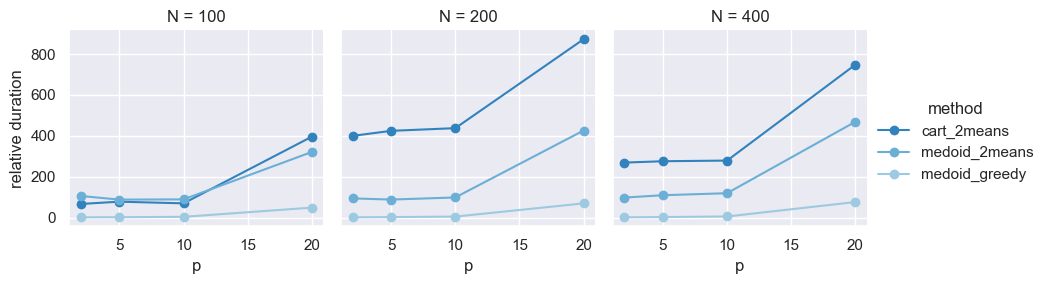

In [297]:
from plot_bench import *
sns.set_theme()

# forest_df = make_forest_df(df[df.method.isin(['cart_2means', 'medoid_2means'])])
forest_df = make_forest_df(df)
plot_forest_df(forest_df, ref_method='medoid_greedy')

 /Users/matthieubulte/Documents/university/phd/merf/benchmark/plot_bench.py:7: FutureWarning:The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


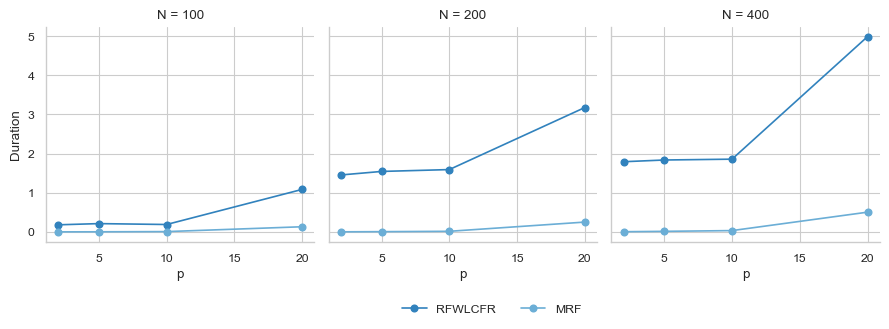

In [318]:
from plot_bench import *

sns.set_style("whitegrid")
sns.set_context("paper")
forest_df = make_forest_df(df)
plot_forest_df(forest_df)
# sns.despine(left=True)
plt.savefig("./runtime_sphere.pdf")

## MSE CART vs Medoid

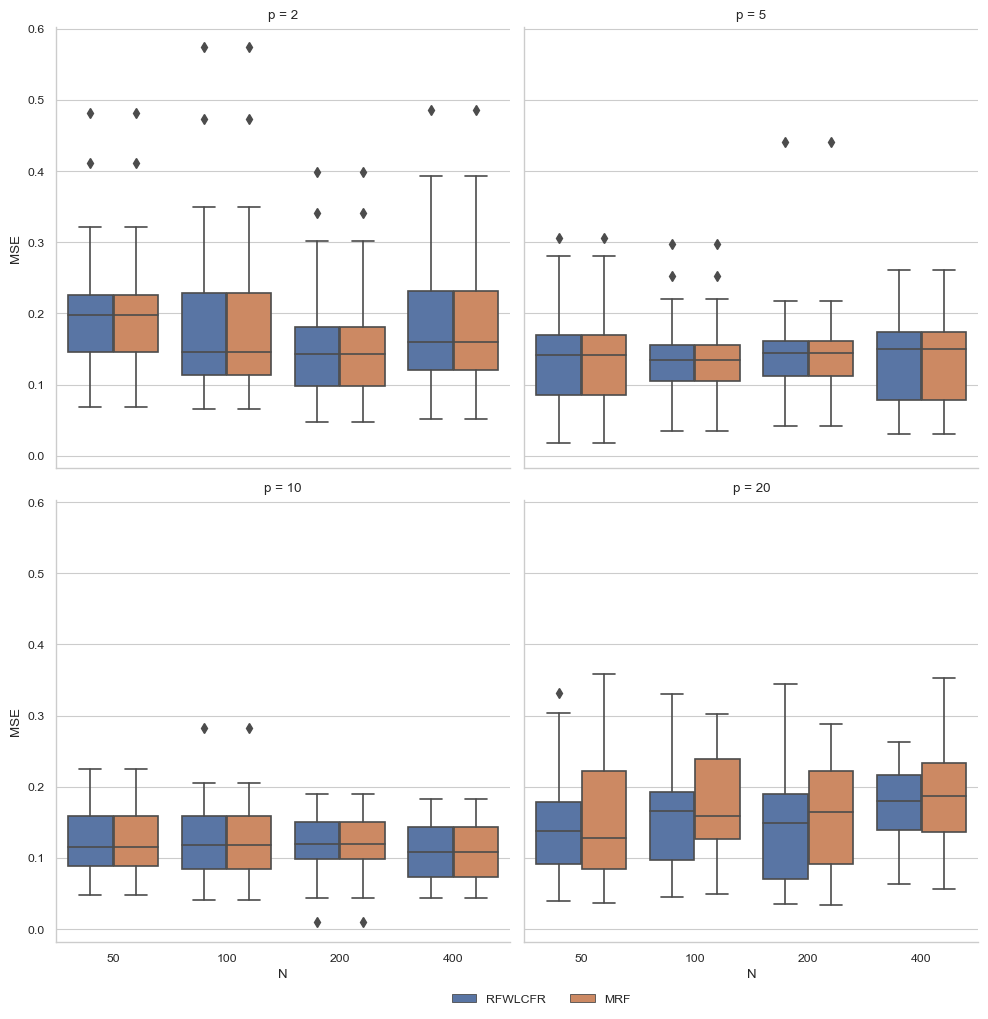

In [367]:
from plot_bench import *
plot_errors(df[df.err < 0.6])

plt.savefig("./error_sphere.pdf")

## Runtime CART vs Medoid

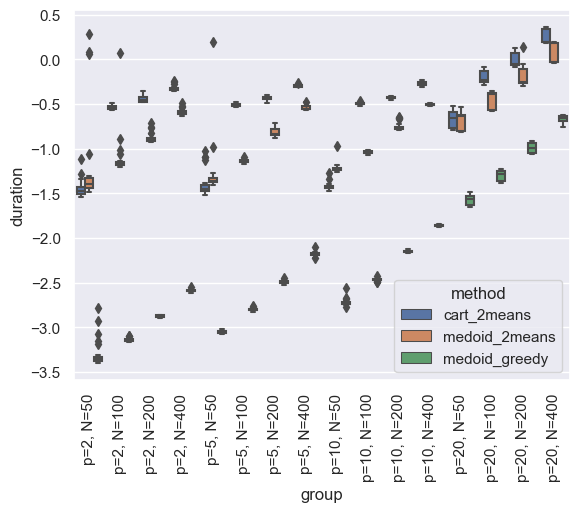

In [289]:
sns.boxplot(df, y=np.log10(df['duration']), x='group', hue='method')
plt.xticks(rotation=90);